# Heatmap 
- using padj < 0.01 as the cutoff for the current analysis

In [69]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [70]:
library(ggplot2)
library(dplyr)
library(NMF)
library(RColorBrewer)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(glue)

In [71]:
feat_df <- read.table("../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/one_wayANOVA_hMinImp_TICnorm_groupFil0.3_HILICpos_fullreport.csv"
        ,row.names = 1, header = TRUE, sep = ',')

In [72]:
head(feat_df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Naive_percNA,Naive_mean,R5neg_percNA,R5neg_mean,R5pos_percNA,R5pos_mean,gMean_Naive,gMean_R5neg,gMean_R5pos,log2FC_R5negvsNaive,log2FC_R5posvsNaive,log2FC_R5posvsR5neg,f_score,pval,padj,Tpadj_R5neg.Naive,Tpadj_R5pos.Naive,Tpadj_R5pos.R5neg,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,85.0044,26.00,19.67,28.11,0,2003055,0.96,0.93,106,23,0.0000000,70477.00,0,118403.5,0.3333333,33095.50,15.90627,17.05434,14.35138,1.14807506,-1.5548861,-2.7029612,8.8937320,1.604757e-02,0.0477060464,2.525009e-01,0.11346999,1.340772e-02,14.72954,16.52419,16.46507,17.00695,17.09726,17.05882,13.45488,15.26659,14.33267,16.25446,16.29809,16.52315
F100,130.9851,25.74,19.67,28.89,1936,3512837,1.00,0.97,217,24,0.0000000,150293.00,0,141202.2,0.0000000,140867.67,17.07746,17.30965,15.63098,0.23218340,-1.4464799,-1.6786633,0.6509183,5.548268e-01,0.6244123004,9.883995e-01,0.65587558,5.741049e-01,17.57323,17.42220,16.23697,17.33909,17.29740,17.29246,11.81848,17.58103,17.49345,17.66144,17.55834,17.36552
F10000,393.2598,422.45,419.56,429.02,8551,3235844,1.00,0.90,148,17,0.0000000,58362.33,1,NA,0.0000000,127009.33,15.81875,12.01507,16.72202,-3.80368821,0.9032661,4.7069543,164.8421502,5.710323e-06,0.0005958801,2.179699e-05,0.03849116,5.862164e-06,15.98142,15.86099,15.61386,12.01507,12.01507,12.01507,16.84734,16.11733,17.20139,19.59158,16.12541,14.16461
F10004,393.2680,482.62,478.42,487.62,8553,1092807,0.91,0.97,51,11,0.6666667,119684.00,1,NA,0.0000000,157185.67,15.55525,14.89055,17.06225,-0.66469949,1.5070002,2.1716997,7.4844840,2.342732e-02,0.0612671337,5.185935e-01,0.08764415,2.156493e-02,14.89055,14.89055,16.88465,14.89055,14.89055,14.89055,16.86880,16.79105,17.52690,16.32349,15.94052,15.99033
F10006,409.2267,310.52,291.08,330.49,8979,10810474,1.00,0.95,161,24,0.0000000,573708.67,0,527570.3,0.0000000,420937.67,19.11073,19.20785,18.51229,0.09712025,-0.5984424,-0.6955626,11.5954627,8.683807e-03,0.0315446686,8.145709e-01,0.02037338,1.032288e-02,18.79916,19.33012,19.20292,19.18923,19.07756,19.35677,18.49627,18.63580,18.40481,17.48562,18.17996,18.92816
F10007,409.2267,348.62,344.16,364.12,8979,2149563,1.00,0.90,69,24,0.0000000,17758.00,0,23847.5,0.0000000,19529.67,14.07489,14.63280,13.93522,0.55791087,-0.1396680,-0.6975789,0.7671954,5.050208e-01,0.5786421349,6.394432e-01,0.97032238,5.107099e-01,14.18142,14.40873,13.63451,15.04201,13.74698,15.10940,12.87809,14.35426,14.57330,17.59065,16.99836,17.16847


In [73]:
meta_df <- read.table("../../input/sequence_file/clean_deduplicated_meta_df.csv",
                     header = TRUE, sep = ',', row.names = 1)

In [74]:
head(meta_df,5)

,class,biological_samples,cell_number
,<chr>,<chr>,<int>
Naive_1,Naive,Yes,300
Naive_2,Naive,Yes,300
Naive_3,Naive,Yes,300
R5neg_1,R5neg,Yes,655
R5neg_2,R5neg,Yes,687


In [75]:
sample_names = colnames(feat_df)[grepl('Naive\\_[0-9]+|R5pos\\_[0-9]+|R5neg\\_[0-9]+',colnames(feat_df))]
sample_names
length(sample_names)
padj_columns = colnames(feat_df[grepl('padj',colnames(feat_df))]);padj_columns

[1] "Naive_1" "Naive_2" "Naive_3" "R5neg_1" "R5neg_2" "R5neg_3" "R5pos_1"
[8] "R5pos_2" "R5pos_3"

[1] 9

[1] "padj"              "Tpadj_R5neg.Naive" "Tpadj_R5pos.Naive"
[4] "Tpadj_R5pos.R5neg"

In [76]:
colnames(meta_df)

[1] "class"              "biological_samples" "cell_number"

# Define filtering level - FDR control

In [77]:
filtered_level = 0.01
feat_df.filt = feat_df[feat_df$padj < filtered_level & !is.na(feat_df$padj),]

In [78]:
dim(feat_df.filt)

[1] 556  40

## subset datatable with only data values

In [79]:
feat_df.filt.data = feat_df.filt[sample_names]

# Plot heatmap wrapper function

In [80]:
feat_df.filt.data.scale <- t(scale(t(feat_df.filt.data)))

In [81]:
range(feat_df.filt.data.scale, na.rm = TRUE)

[1] -1.856019  2.000730

#### columns and rows annotation

In [82]:
colnames(meta_df)

[1] "class"              "biological_samples" "cell_number"

In [83]:
unique(meta_df$class)

[1] "Naive" "R5neg" "R5pos"

## Since the metadata is not exclusively the data 

In [84]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[sample_names,]

In [85]:
assign_values4annot <- function(df = feat_df.filt.data.scale, 
                                meta_column_name = 'class') {  
    Var_vec = colnames(df)
    for (factor_level in unique(meta_df[,meta_column_name])) {
        Var_vec[Var_vec %in% 
                 rownames(meta_df[meta_df[,meta_column_name] == factor_level,])] = factor_level
        }
    return(Var_vec)
}

In [86]:
Var1_vec = assign_values4annot(feat_df.filt.data.scale, 'class')

In [87]:
annotation_col = data.frame(class = Var1_vec)
rownames(annotation_col) = colnames(feat_df.filt.data.scale)                            

# annotation_col = data.frame(illness_duration = Var1_vec, 
#                             gender = Var2_vec, 
#                             age = Var3_vec)
# rownames(annotation_col) = colnames(feat_df.filt.data.scale)

In [88]:
# since age is continuous measure (integers), needs to convert to integers
# annotation_col$age = as.integer(annotation_col$age)

In [89]:
annotation_col$class

[1] "Naive" "Naive" "Naive" "R5neg" "R5neg" "R5neg" "R5pos" "R5pos" "R5pos"

#### Annotation of rows (here don't have these)

In [90]:
# panel_vec = sapply(strsplit(rownames(feat_df.filt.data.scale),"_",1),function(x)x[1])
# annotation_row = data.frame(panel = panel_vec) 
# rownames(annotation_row) = rownames(feat_df.filt.data.scale)

## Assign colors

In [91]:
class = c("#888888","#0000ff","#ff0000")
names(class) = c("Naive","R5pos","R5neg")

# gender = c("#FF7A33", "#33D7FF")
# names(gender) = c("Female","Male")

In [92]:
ann_colors = list(class = class)
# ann_colors = list(illness_duration = illness_duration, 
#                   gender = gender,
#                   age = age
#                  )

In [93]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.856019  2.000730

In [94]:
feat_df.filt.data.scale[feat_df.filt.data.scale < -2] = -2
feat_df.filt.data.scale[feat_df.filt.data.scale > 2] = 2

In [95]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.856019  2.000000

In [96]:
breaksList = seq(range(feat_df.filt.data.scale)[1],
                 range(feat_df.filt.data.scale)[2],
                 length.out = 100) 

quantile_breaks <- function(xs, n = 100) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(feat_df.filt.data.scale, n = 101)
cell_colors <- colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(length(mat_breaks))

In [97]:
# options(repr.plot.width=30, repr.plot.height=30, res=300)
# pheatmap(feat_df.filt.data.NA.scale.rplNAmin, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, 
#          annotation_col = annotation_col, annotation_row = annotation_row, clustering_method = "complete", 
#          cellwidth = 5,cellheight = 10, annotation_colors = ann_colors,
#          color = cell_colors)

In [98]:
out_dir = "../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/heatmap/"
dir.create(out_dir)

exp_label = 'hMinImp_TICnorm_HILICpos_1wayANOVA'
out_pdf_file = file.path(out_dir, glue("{exp_label}_padj{filtered_level}_heatmap.pdf"))

Warning message in dir.create(out_dir):
“'../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/heatmap' already exists”


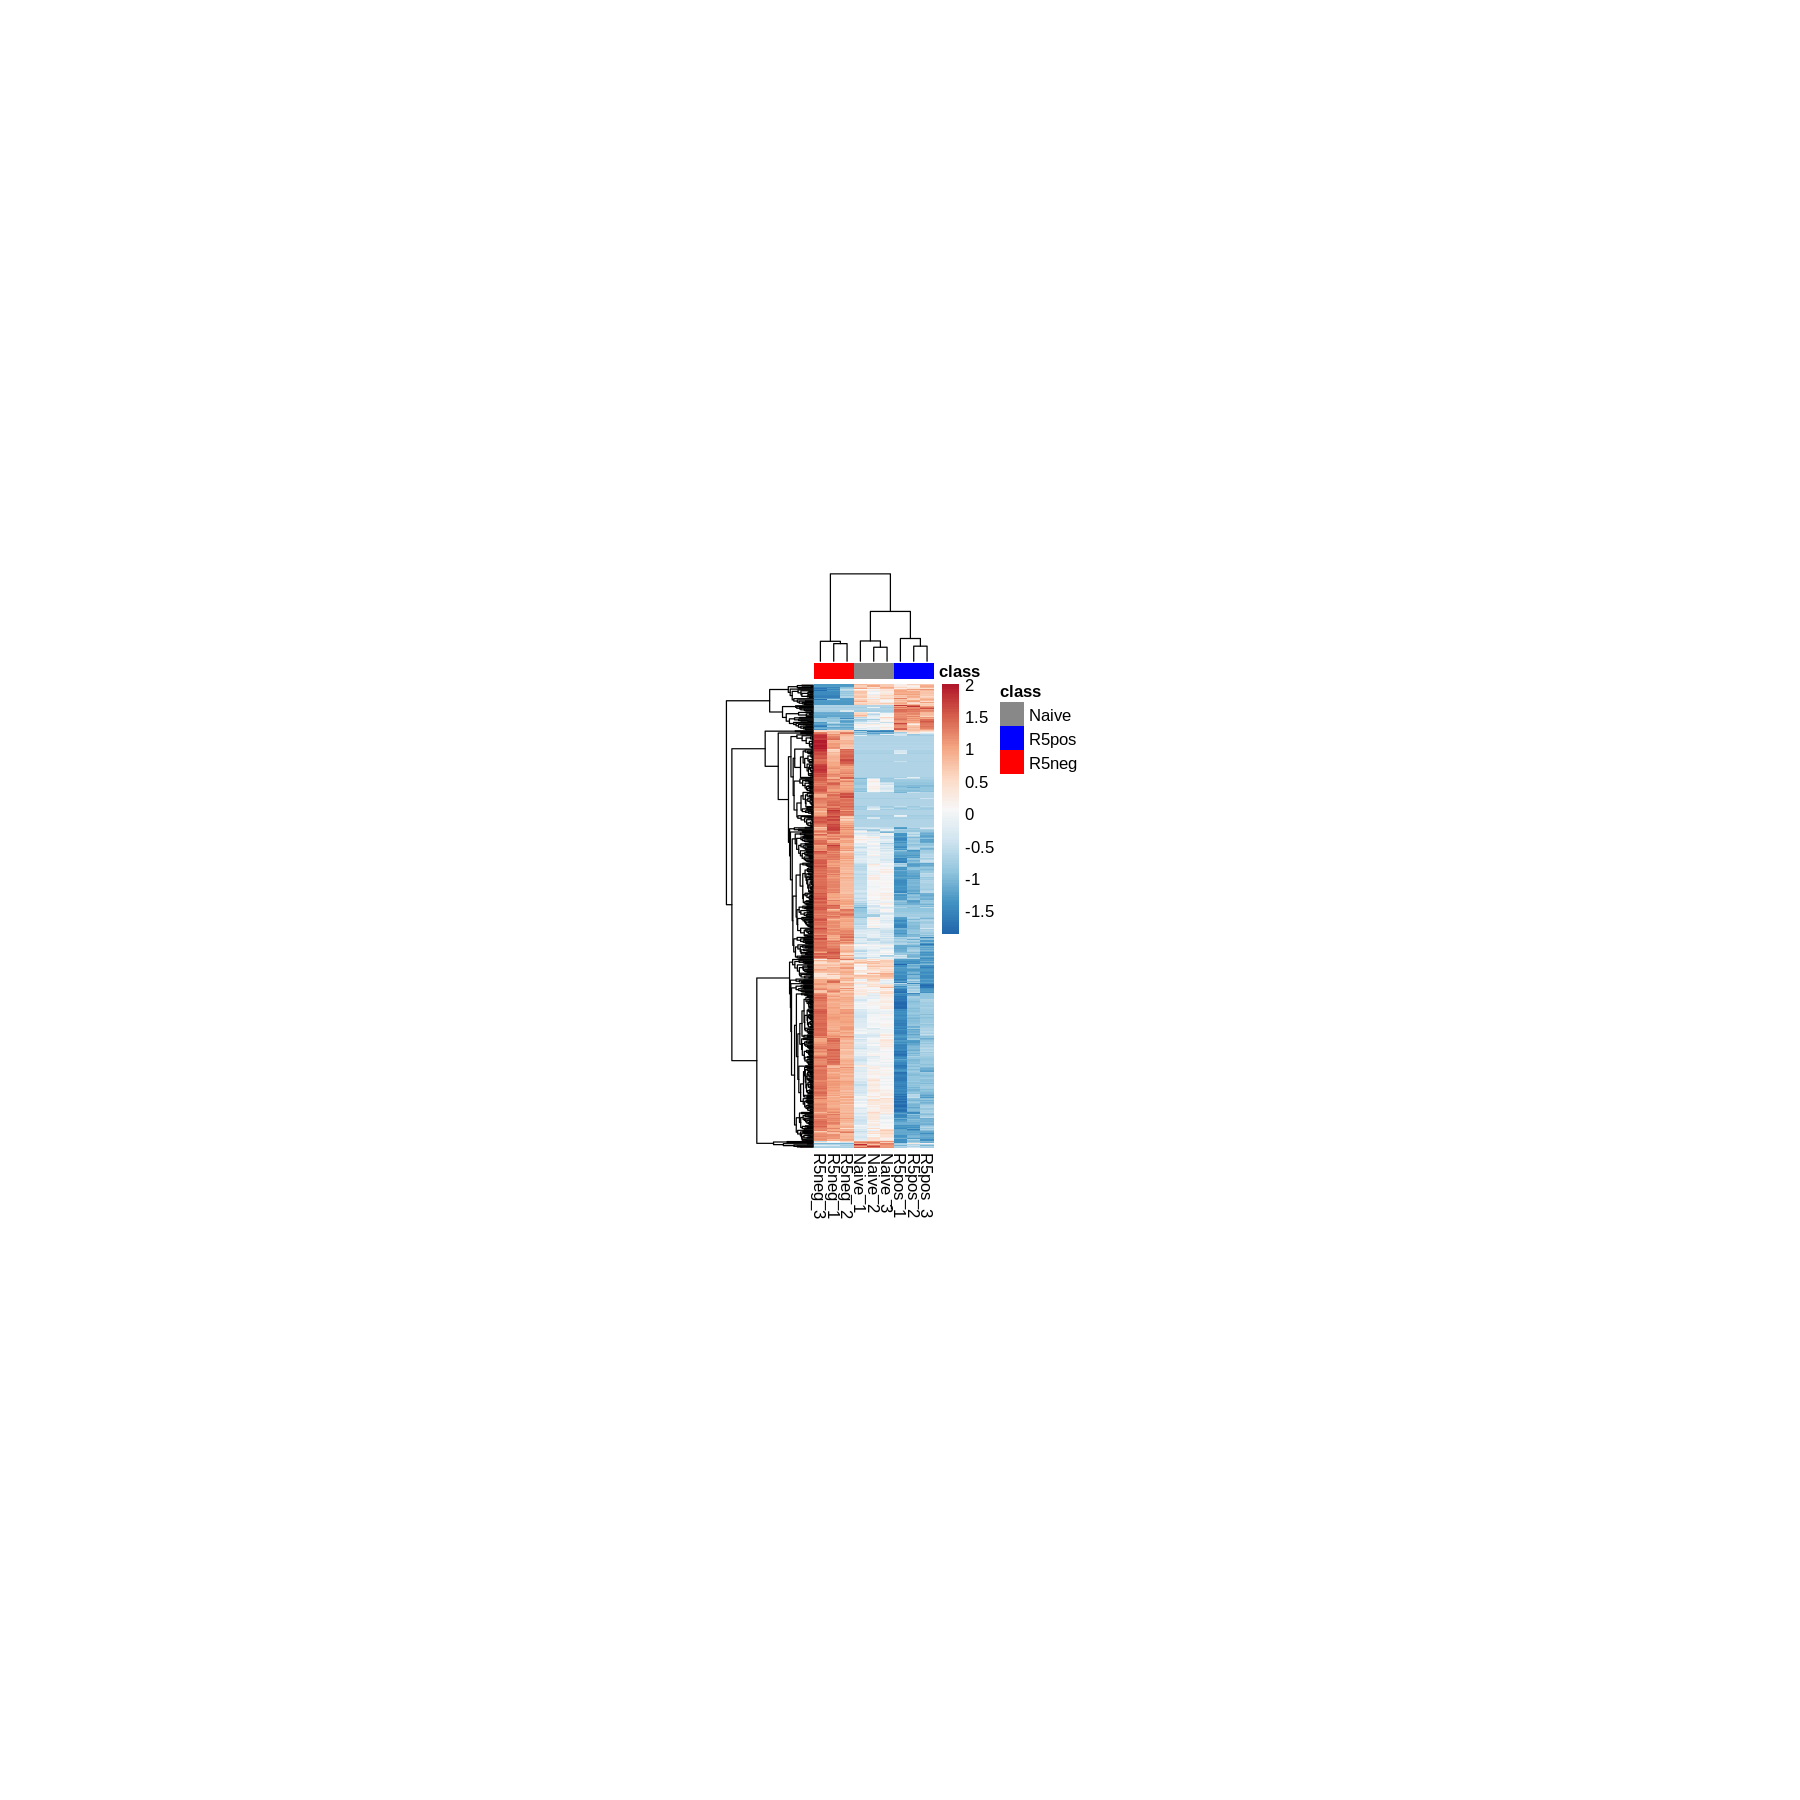

In [99]:
figure_width = 15
figure_height = 15
options(repr.plot.width = figure_width, repr.plot.height = figure_height, res = 300)
library(pheatmap)
p <- pheatmap(feat_df.filt.data.scale,  # data file
         cluster_rows = TRUE, 
         show_rownames = FALSE, 
         cluster_cols = TRUE, 
         annotation_col = annotation_col, 
         clustering_method = "mcquitty",
         cellwidth = 8,
         cellheight = 0.5,
         color = cell_colors,
         annotation_colors = ann_colors)
ggsave(p, file = out_pdf_file, width = figure_width, height = figure_height, )

-----